I've been keeping a timesheet since grad school, when I started tracking how much I worked and what I spent my time on to better understand my work habits. Now that I've transitioned out of my previous job, I thought it'd be interesting to look at how the time I spent working evolved over the 3.5 years I was there.

This post will be a first-pass exploration, primarily focused on _how much_ I worked. I'm mostly interested in the 2020 period, when we launched a Covid campaign that rapidly expanded and set us up on the path for the hyper-growth we experienced in the past few years, growing from just 5 people to over 150.

My hypothesis is that despite having extremely strong memories of stress and burnout, it wasn't because I was working inhumanely long days. I think that the negative feelings were because, yes, I was working a lot, but also there was a pandemic happening, we were locked down, and a lot of the company's success rested on my shoulders. 

I'm also curious about how my work habits evolved as both the company and my own work habits stabilized. The last year or so felt dramatically different from the prior two in terms of work-life balance, and I'm wondering if that will be reflected in the total hours that I worked.

Let's dig in to the data!

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I keep track of my timesheet in a google sheet, where each year is a separate tab. Beyond how much time I work, I track some additional metadata like what category of work it is (for example Biobot vs. professional development work like writing this blog) and where I worked. For this analysis, I'm just going to focus on the amount of time I worked for Biobot, so I'll keep only those relevant columns.

In [48]:
keep_cols = ['weeknumber', 'weekday', 'date', 'start', 'end', 'duration', 'category']
biobot_years = ['2019', '2020', '2021', '2022', '2023']
df = pd.concat([pd.read_excel('Timesheet.xlsx', sheet_name=s)[keep_cols].dropna(subset=['date']) for s in biobot_years])

df = df[df['category'] == 'biobot']

In [49]:
df.head()

,weeknumber,weekday,date,start,end,duration,category
65,5,2,2019-01-28,09:30:00,17:15:00,07:45:00,biobot
68,5,3,2019-01-29,10:00:00,18:30:00,08:30:00,biobot
70,5,4,2019-01-30,09:15:00,16:45:00,07:30:00,biobot
71,5,4,2019-01-30,17:20:00,18:00:00,00:40:00,biobot
74,5,5,2019-01-31,09:30:00,18:00:00,08:30:00,biobot


In [50]:
# Check that I have all the data I expect
df['date'].min(), df['date'].max()

(Timestamp('2019-01-28 00:00:00'), Timestamp('2023-03-13 00:00:00'))

In [51]:
# Get total hours per day
def convert_duration_to_minutes(t):
    """Convert %H:%M:%S datetime.date object to total minutes"""
    return t.hour * 60 + t.minute

df['duration_minutes'] = df['duration'].apply(convert_duration_to_minutes)

bbdf = df.groupby('date')['duration_minutes'].sum().reset_index()
bbdf['duration_hours'] = bbdf['duration_minutes'] / 60.

<Axes: xlabel='date', ylabel='duration_hours'>

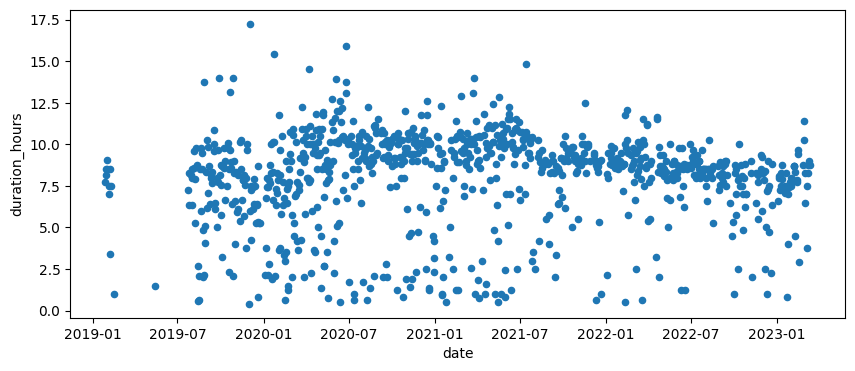

In [58]:
fig, ax = plt.subplots(figsize=(10, 4))
bbdf.plot(x='date', y='duration_hours', kind='scatter', ax=ax)

In [71]:
# Mark weekday vs weekend
bbdf['weekday'] = bbdf['date'].apply(lambda x: x.weekday())

# Monday is 0 and Sunday is 6.
bbdf['weekend'] = bbdf['weekday'].apply(lambda x: True if x in [5, 6] else False)

<Axes: xlabel='date', ylabel='duration_hours'>

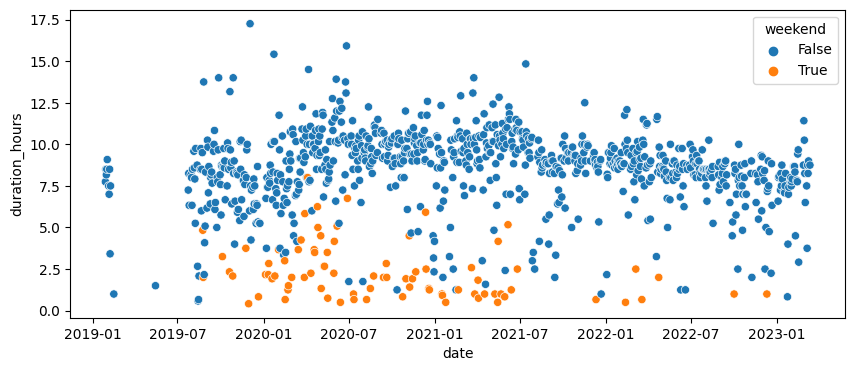

In [75]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(data=bbdf, x='date', y='duration_hours', ax=ax, hue='weekend')

Point out the one week consulting and remove it. Also the one day in the summer when my job almost fell through, remove them.

remove weekends (after looking at number of weeks where i worked weekends over time)

add a dashed line for when we started the pro bono campaign. the really long days pre-covid were probably days i went to NC. figure out when the really long days post-covid were, probably launching the new report.

collapse daily durations on a weekly (or monthly?) basis, so that i can use built-in seaborn CI calculations. 

also just do an OLS - yeah, do that! cuz USDS might ask for it...

